In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV

In [6]:
data = pd.read_csv("classification_data.csv")

In [ ]:
channelgrouplist = list(data['latest_source'].unique())
#channelgrouplist.sort()
channelgrouplist

['gulfnews',
 'google',
 'Pricena_AE',
 'facebook',
 'criteo',
 'yaoota',
 'Pricena_AE_Home']

In [ ]:
data[data['latest_source'] == 'Pricena_AE'][['latest_source']]

,latest_source
20,Pricena_AE
21,Pricena_AE
479,Pricena_AE
4761,Pricena_AE
4762,Pricena_AE
...,...
93174,Pricena_AE
93175,Pricena_AE
93176,Pricena_AE
97460,Pricena_AE


In [7]:
data.head()

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,2021-01-01
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01


In [8]:
data.shape

(100000, 46)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

## EDA

In [10]:
data.isnull().sum()

count_session             0
count_hit                 0
channelGrouping           0
totals_newVisits          0
device_browser            0
device_operatingSystem    0
device_isMobile           0
device_deviceCategory     0
geoNetwork_region         0
geoNetwork_latitude       0
geoNetwork_longitude      0
historic_session          0
historic_session_page     0
youtube                   0
avg_session_time          0
avg_session_time_page     0
single_page_rate          0
sessionQualityDim         0
last_visitId              0
latest_visit_id           0
visitId_threshold         0
earliest_visit_id         0
earliest_visit_number     0
latest_visit_number       0
time_earliest_visit       0
time_latest_visit         0
avg_visit_time            0
days_since_last_visit     0
days_since_first_visit    0
visits_per_day            0
bounce_rate               0
earliest_source           0
latest_source             0
earliest_medium           0
latest_medium             0
earliest_keyword    

In [11]:
nulldata = data.isnull().sum()
nulldf = pd.DataFrame({"features":nulldata.index, "null count":nulldata.values})
nulldf

,features,null count
0,count_session,0
1,count_hit,0
2,channelGrouping,0
3,totals_newVisits,0
4,device_browser,0
5,device_operatingSystem,0
6,device_isMobile,0
7,device_deviceCategory,0
8,geoNetwork_region,0
9,geoNetwork_latitude,0


In [12]:
data.duplicated().sum()

90793

In [13]:
data.head()

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,2021-01-01
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01


In [14]:
drop_col = ["totals_newVisits","device_browser","device_operatingSystem","device_isMobile","geoNetwork_latitude",'geoNetwork_longitude',"youtube","last_visitId","latest_visit_id","visitId_threshold","days_since_last_visit","bounce_rate","days_since_first_visit","bounces","products_array","target_date","earliest_isTrueDirect","latest_isTrueDirect","earliest_visit_id","earliest_keyword","latest_keyword",'earliest_source']
data.drop(drop_col,axis=1,inplace=True)


In [15]:
data.head()

,count_session,count_hit,channelGrouping,device_deviceCategory,geoNetwork_region,historic_session,historic_session_page,avg_session_time,avg_session_time_page,single_page_rate,...,time_latest_visit,avg_visit_time,visits_per_day,latest_source,earliest_medium,latest_medium,num_interactions,time_on_site,transactionRevenue,has_converted
0,9,1194,(Other),mobile,Sharjah,6504,1254,722.666667,139.333333,0.777778,...,19.17,18,66.333333,gulfnews,app,app,1900,5617,0,0
1,9,1194,(Other),mobile,Sharjah,6504,1254,722.666667,139.333333,0.777778,...,19.17,18,66.333333,gulfnews,app,app,1900,5617,0,0
2,28,1816,Paid Search,mobile,Ajman,12466,4963,445.214286,177.250000,0.821429,...,11.20,11,73.480000,google,(none),cpc,3843,77417,1477195214,1
3,2,299,Paid Search,mobile,Abu Dhabi,1575,0,787.500000,0.000000,1.000000,...,14.90,17,37.375000,google,cpc,cpc,592,1576,0,0
4,2,299,Paid Search,mobile,Abu Dhabi,1575,0,787.500000,0.000000,1.000000,...,14.90,17,37.375000,google,cpc,cpc,592,1576,0,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   count_session          100000 non-null  int64  
 1   count_hit              100000 non-null  int64  
 2   channelGrouping        100000 non-null  object 
 3   device_deviceCategory  100000 non-null  object 
 4   geoNetwork_region      100000 non-null  object 
 5   historic_session       100000 non-null  int64  
 6   historic_session_page  100000 non-null  int64  
 7   avg_session_time       100000 non-null  float64
 8   avg_session_time_page  100000 non-null  float64
 9   single_page_rate       100000 non-null  float64
 10  sessionQualityDim      100000 non-null  int64  
 11  earliest_visit_number  100000 non-null  int64  
 12  latest_visit_number    100000 non-null  int64  
 13  time_earliest_visit    100000 non-null  float64
 14  time_latest_visit      100000 non-nul

In [17]:
data['latest_source'].value_counts()

latest_source
google             91489
facebook            6538
criteo              1285
Pricena_AE           502
yaoota               182
gulfnews               2
Pricena_AE_Home        2
Name: count, dtype: int64

In [18]:
data['latest_medium'].value_counts()

latest_medium
cpc    99998
app        2
Name: count, dtype: int64

In [19]:
data['earliest_medium'].value_counts()

earliest_medium
cpc                 77444
(none)               9214
push                 5675
inapp                2604
organic              2074
search                959
cartpush              848
coupon                493
email                 248
reactivationpush      129
referral               99
signupinapp            97
nosignuppush           52
sms                    21
WhatsApp               21
channelsight           16
SocialMedia             4
app                     2
Name: count, dtype: int64

In [20]:
cat = []
num = []
for i in data.columns:
    if (data[i].dtypes == "object") or (data[i].dtypes == bool):
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['channelGrouping', 'device_deviceCategory', 'geoNetwork_region', 'latest_source', 'earliest_medium', 'latest_medium']
['count_session', 'count_hit', 'historic_session', 'historic_session_page', 'avg_session_time', 'avg_session_time_page', 'single_page_rate', 'sessionQualityDim', 'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit', 'time_latest_visit', 'avg_visit_time', 'visits_per_day', 'num_interactions', 'time_on_site', 'transactionRevenue', 'has_converted']


In [21]:
data[cat]

,channelGrouping,device_deviceCategory,geoNetwork_region,latest_source,earliest_medium,latest_medium
0,(Other),mobile,Sharjah,gulfnews,app,app
1,(Other),mobile,Sharjah,gulfnews,app,app
2,Paid Search,mobile,Ajman,google,(none),cpc
3,Paid Search,mobile,Abu Dhabi,google,cpc,cpc
4,Paid Search,mobile,Abu Dhabi,google,cpc,cpc
...,...,...,...,...,...,...
99995,Paid Search,mobile,Dubai,google,cpc,cpc
99996,Paid Search,mobile,Dubai,google,cpc,cpc
99997,Paid Search,mobile,Dubai,google,cpc,cpc
99998,Paid Search,mobile,Dubai,google,cpc,cpc


In [22]:
for i in cat:
  data[i] = pd.Categorical(data[i]).codes

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   count_session          100000 non-null  int64  
 1   count_hit              100000 non-null  int64  
 2   channelGrouping        100000 non-null  int8   
 3   device_deviceCategory  100000 non-null  int8   
 4   geoNetwork_region      100000 non-null  int8   
 5   historic_session       100000 non-null  int64  
 6   historic_session_page  100000 non-null  int64  
 7   avg_session_time       100000 non-null  float64
 8   avg_session_time_page  100000 non-null  float64
 9   single_page_rate       100000 non-null  float64
 10  sessionQualityDim      100000 non-null  int64  
 11  earliest_visit_number  100000 non-null  int64  
 12  latest_visit_number    100000 non-null  int64  
 13  time_earliest_visit    100000 non-null  float64
 14  time_latest_visit      100000 non-nul

<Axes: >

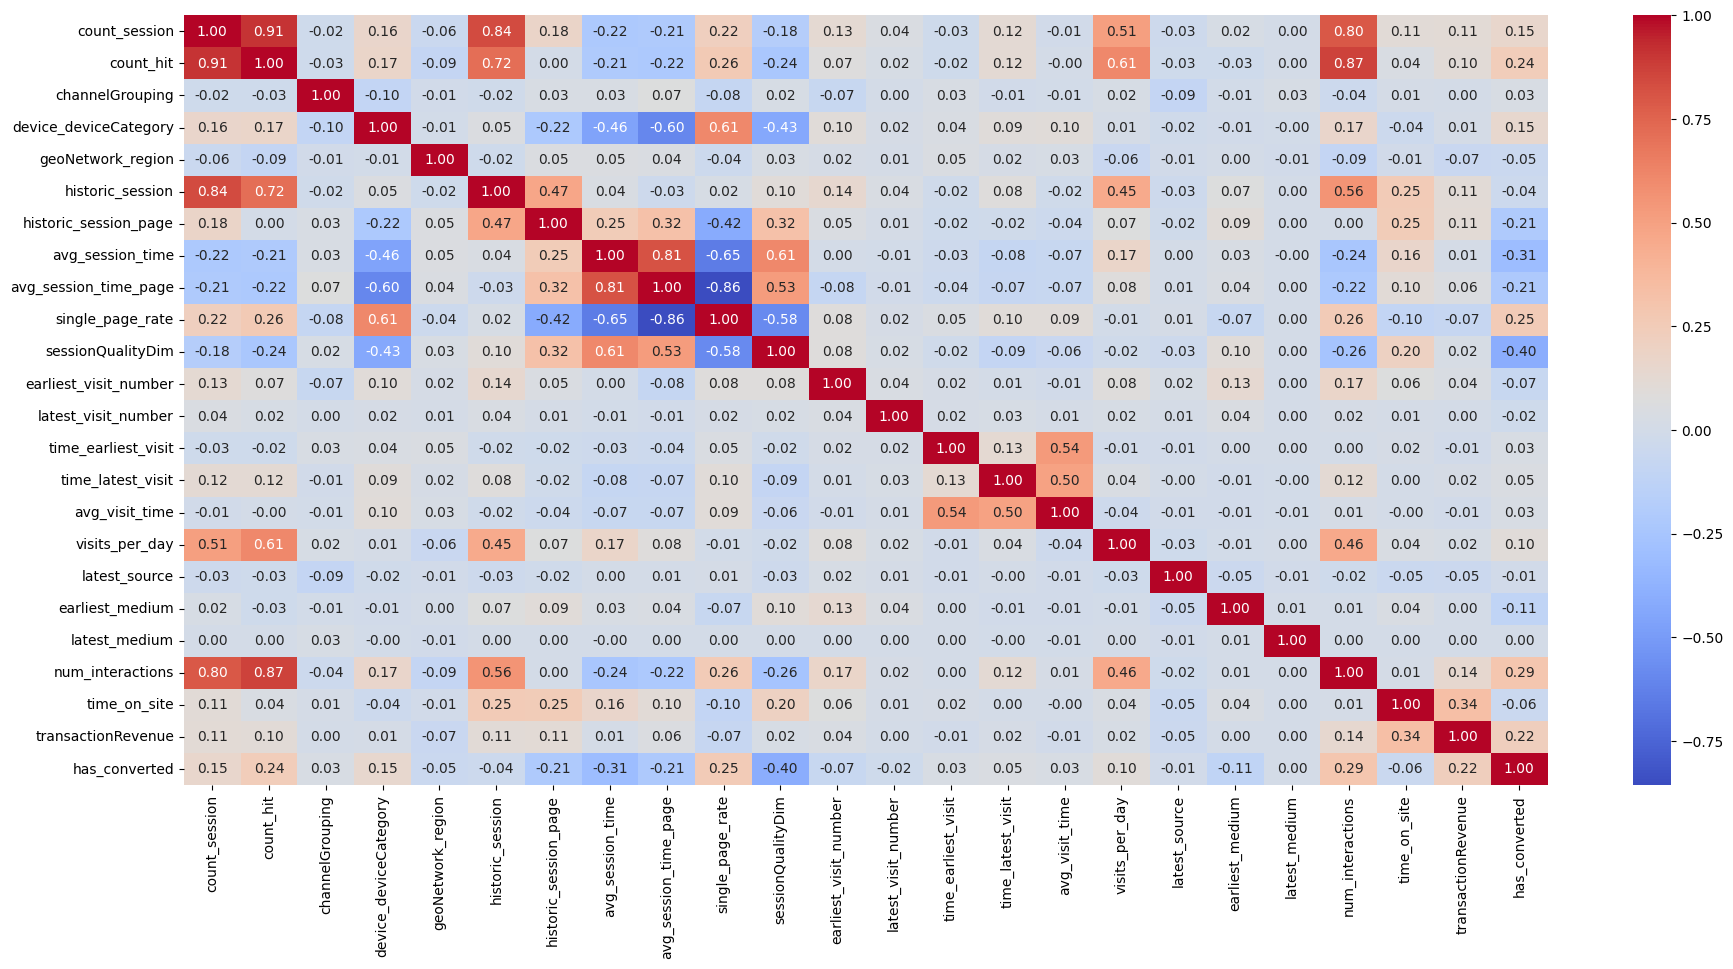

In [24]:
plt.figure(figsize=(22,10))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".2f")

In [26]:
x = data[['count_hit','channelGrouping','device_deviceCategory','geoNetwork_region','historic_session_page','avg_visit_time','latest_source','earliest_medium','latest_medium','time_on_site','transactionRevenue']]
y = data[["has_converted"]]

In [27]:
x.head(25)

,count_hit,channelGrouping,device_deviceCategory,geoNetwork_region,historic_session_page,avg_visit_time,latest_source,earliest_medium,latest_medium,time_on_site,transactionRevenue
0,1194,0,1,71,1254,18,5,3,0,5617,0
1,1194,0,1,71,1254,18,5,3,0,5617,0
2,1816,2,1,2,4963,11,4,0,1,77417,1477195214
3,299,2,1,1,0,17,4,7,1,1576,0
4,299,2,1,1,0,17,4,7,1,1576,0
5,299,2,1,1,0,17,4,7,1,1576,0
6,299,2,1,1,0,17,4,7,1,1576,0
7,299,2,1,1,0,17,4,7,1,1576,0
8,299,2,1,1,0,17,4,7,1,1576,0
9,299,2,1,1,0,17,4,7,1,1576,0


In [ ]:
import statsmodels.formula.api as sm
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)
vif_cal(input_data=x)

count_hit  VIF =  1.05
channelGrouping  VIF =  1.02
device_deviceCategory  VIF =  1.11
geoNetwork_region  VIF =  1.02
historic_session_page  VIF =  1.14
avg_visit_time  VIF =  1.01
latest_source  VIF =  1.02
earliest_medium  VIF =  1.01
latest_medium  VIF =  1.0
time_on_site  VIF =  1.19
transactionRevenue  VIF =  1.14


<Axes: >

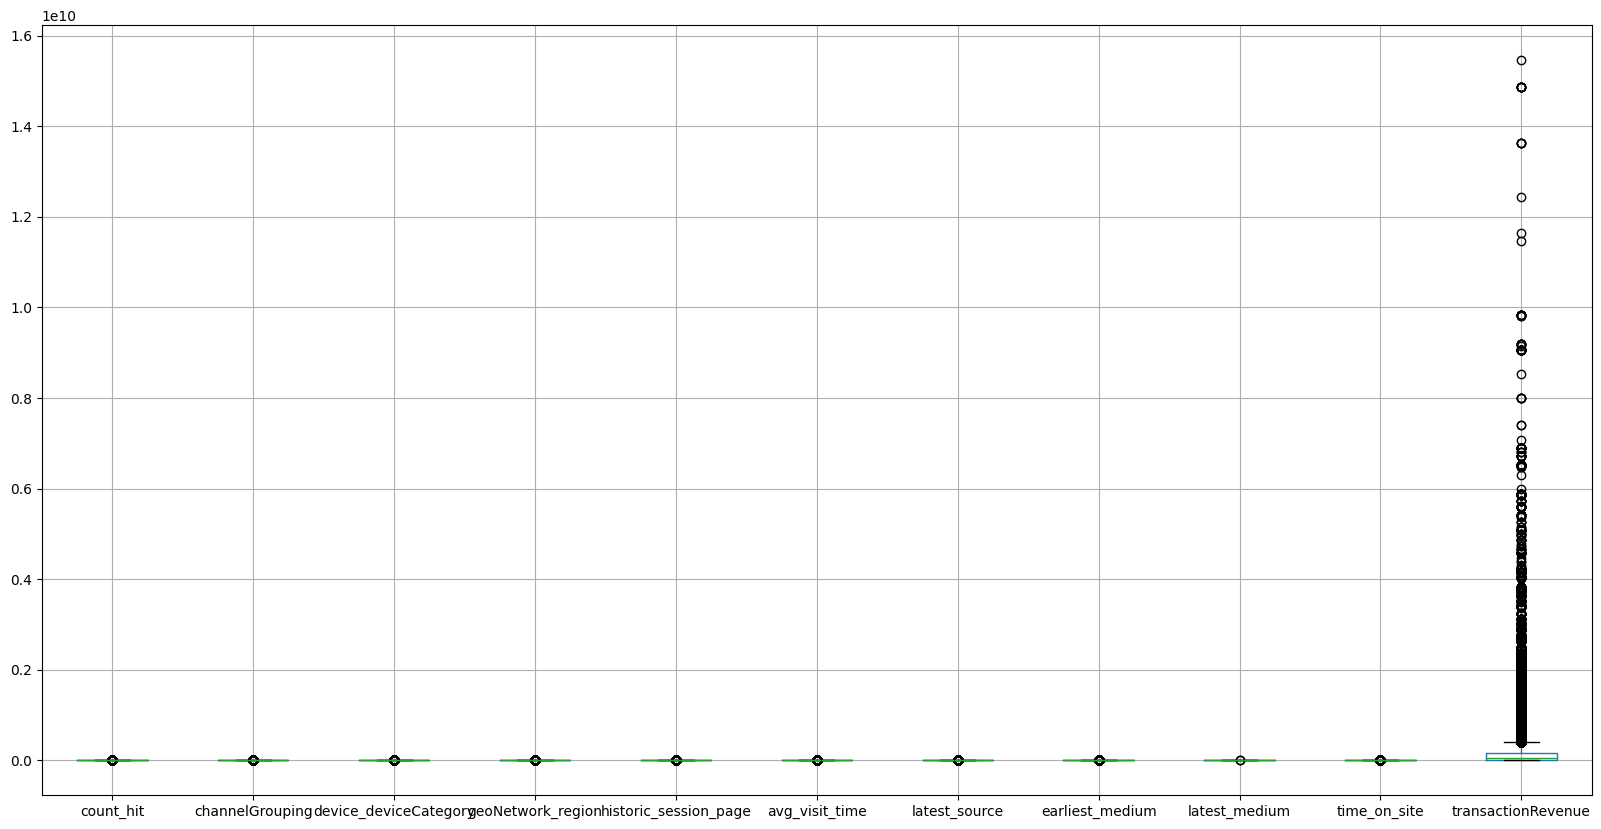

In [28]:
plt.figure(figsize=(20,10))
x.boxplot()

In [29]:
data['transactionRevenue'].value_counts()

transactionRevenue
0            38801
255963737      127
133331518      125
437861180      123
171510985      122
             ...  
54125395         1
15028783         1
46349506         1
16071541         1
326899910        1
Name: count, Length: 4755, dtype: int64

In [ ]:
def inv(x):
  if x == 0:
    return 0
  if x != 0:
    return float((1/x))

In [ ]:
(data['transactionRevenue'].apply(inv)).tail(15)#.round(2)#.isnull().mean()

99985    6.704585e-09
99986    6.704585e-09
99987    6.704585e-09
99988    6.704585e-09
99989    6.704585e-09
99990    6.704585e-09
99991    6.704585e-09
99992    6.704585e-09
99993    6.704585e-09
99994    6.704585e-09
99995    6.704585e-09
99996    6.704585e-09
99997    6.704585e-09
99998    6.704585e-09
99999    6.704585e-09
Name: transactionRevenue, dtype: float64

In [ ]:
((np.log2(data['transactionRevenue'])).replace((np.log2(data['transactionRevenue'])).min(),0))#.round(2)

0         0.000000
1         0.000000
2        30.460213
3         0.000000
4         0.000000
           ...    
99995    27.152205
99996    27.152205
99997    27.152205
99998    27.152205
99999    27.152205
Name: transactionRevenue, Length: 100000, dtype: float64

In [ ]:
data['transactionRevenue'].min()

0

In [ ]:
data['transactionRevenue'].max()

15464117626

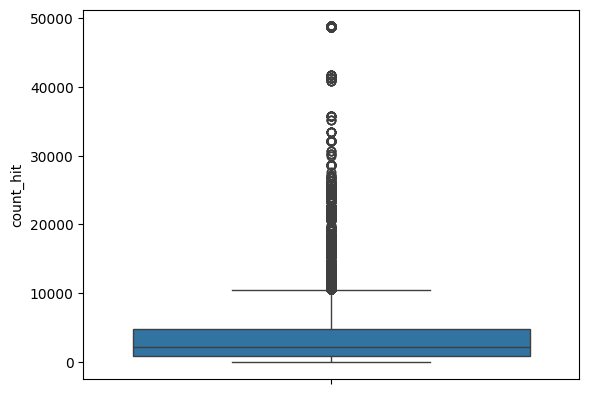

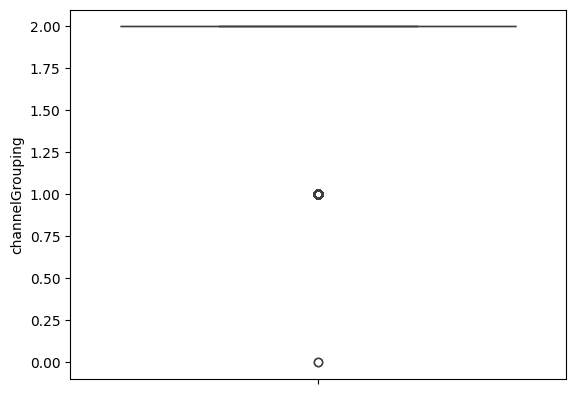

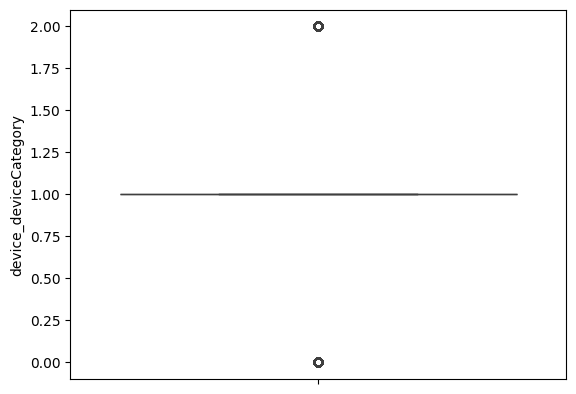

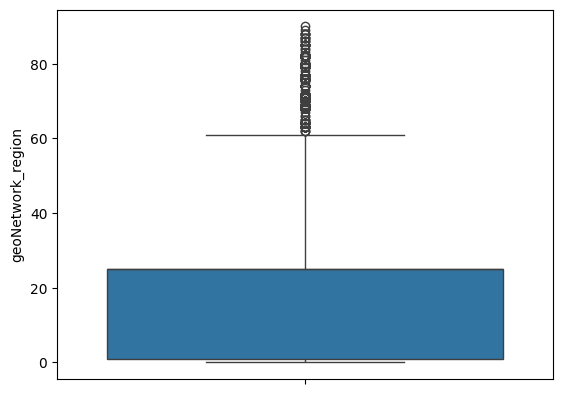

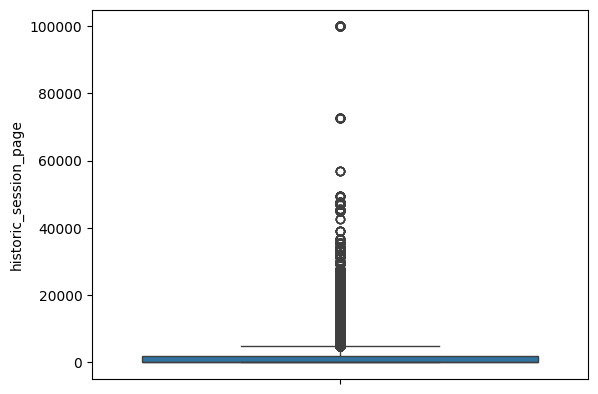

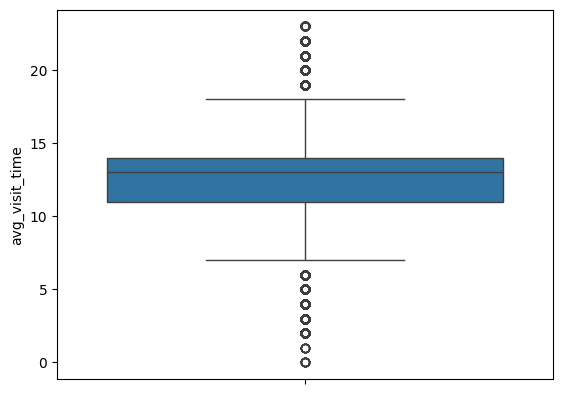

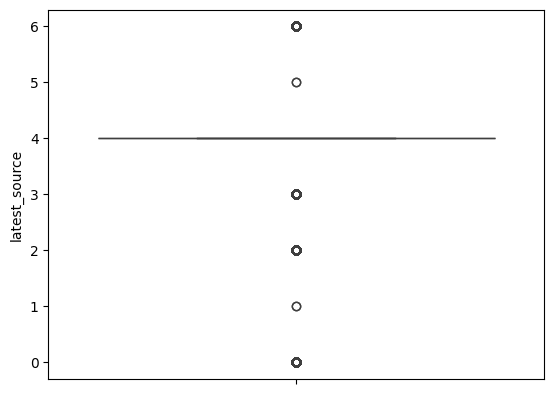

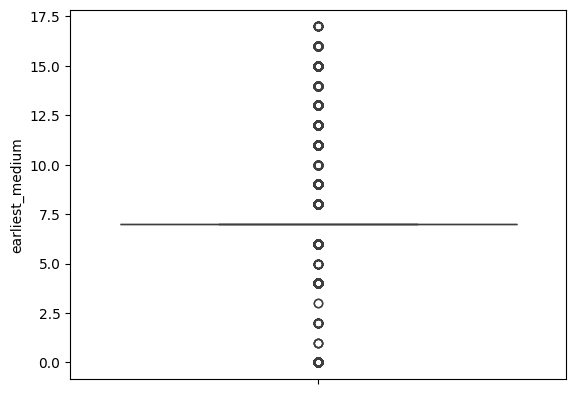

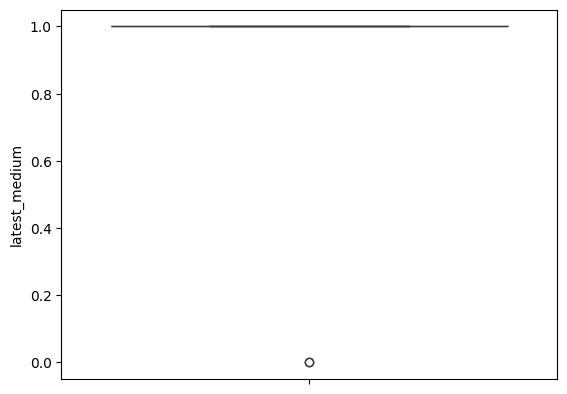

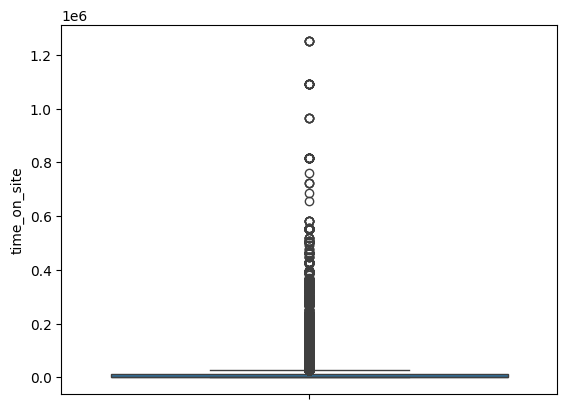

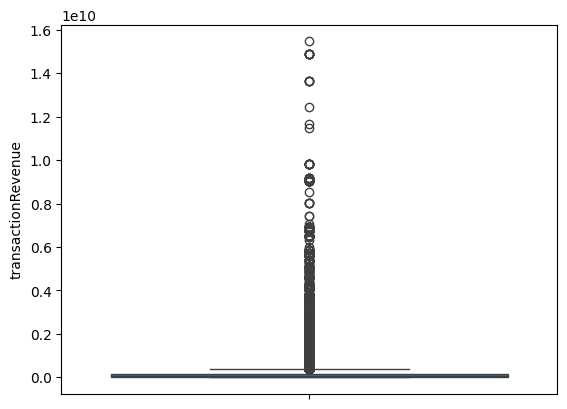

In [30]:
for i in x.columns:
  sns.boxplot(x[i])
  plt.show()

In [ ]:
for i in x.columns:
  x[i] = np.log2(x[i])
x.min()

count_hit                1.0
channelGrouping         -inf
device_deviceCategory   -inf
geoNetwork_region       -inf
historic_session_page   -inf
avg_visit_time          -inf
latest_source           -inf
earliest_medium         -inf
latest_medium           -inf
time_on_site            -inf
transactionRevenue      -inf
dtype: float64

In [ ]:
for i in x.columns[1:]:
  x[i] = x[i].replace(x[i].min(),x[i].median())
x.min()

count_hit                 1.000000
channelGrouping           0.000000
device_deviceCategory     0.000000
geoNetwork_region         0.000000
historic_session_page         -inf
avg_visit_time            0.000000
latest_source             0.000000
earliest_medium           0.000000
latest_medium             0.000000
time_on_site              1.000000
transactionRevenue       20.961519
dtype: float64

In [ ]:
x['historic_session_page'].value_counts()

-inf          63239
 10.274960      211
 11.652845      188
 12.674192      119
 12.170551      119
              ...  
 13.426789        1
 13.338179        1
 10.861087        1
 10.967947        1
 10.754052        1
Name: historic_session_page, Length: 3066, dtype: int64

In [ ]:
x['historic_session_page'].max()

16.608139290843443

In [ ]:
x['historic_session_page'] = x['historic_session_page'].replace(x['historic_session_page'].min(),x['historic_session_page'].max())

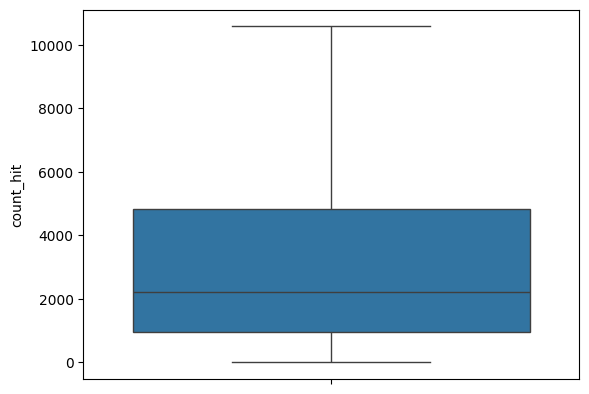

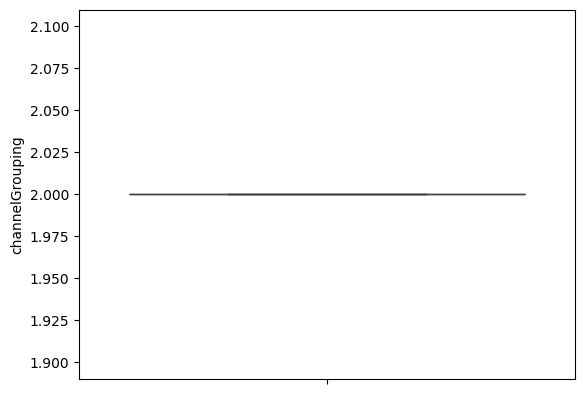

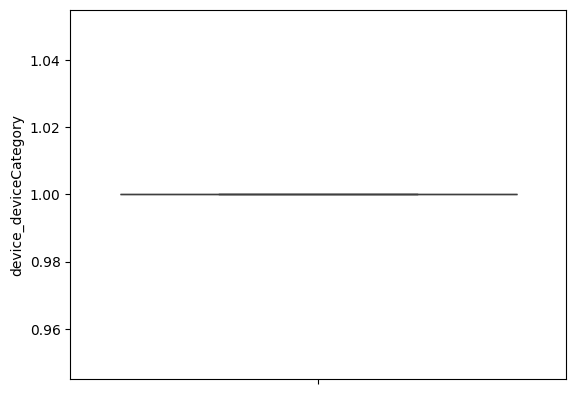

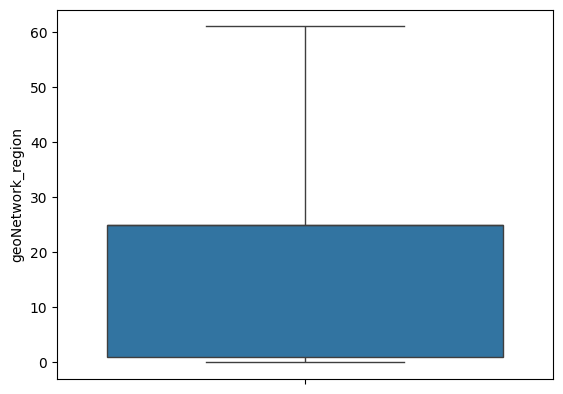

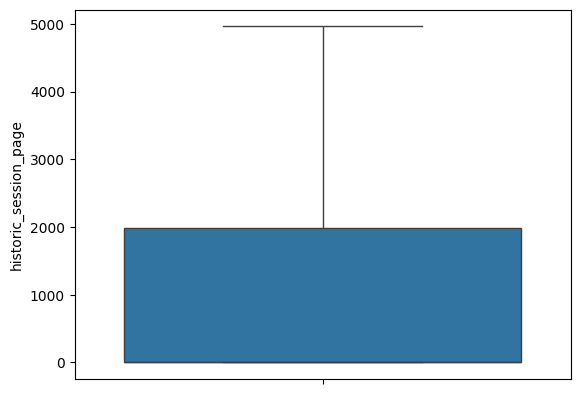

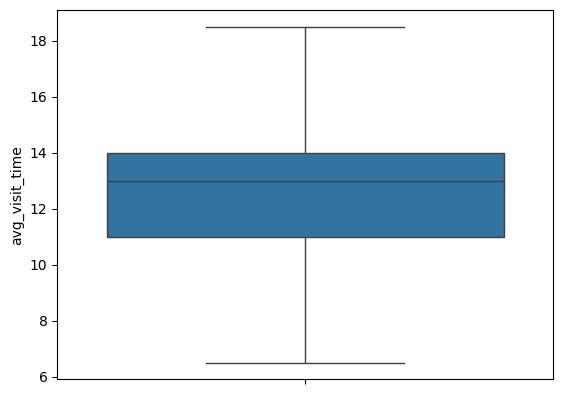

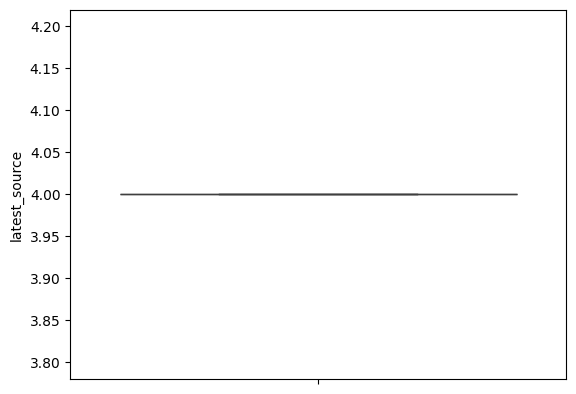

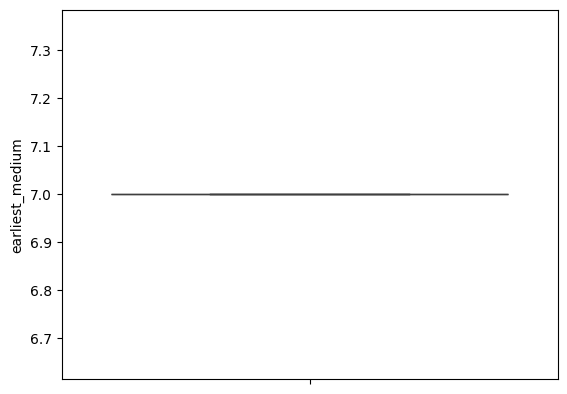

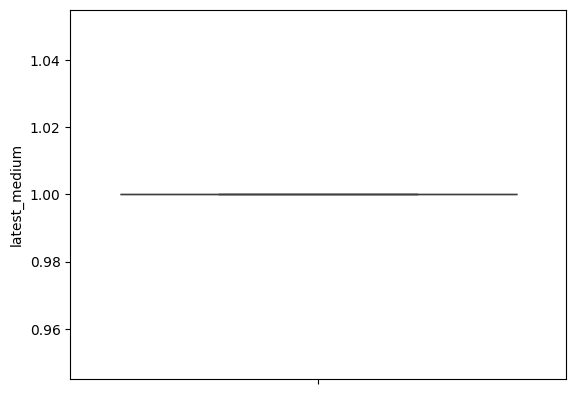

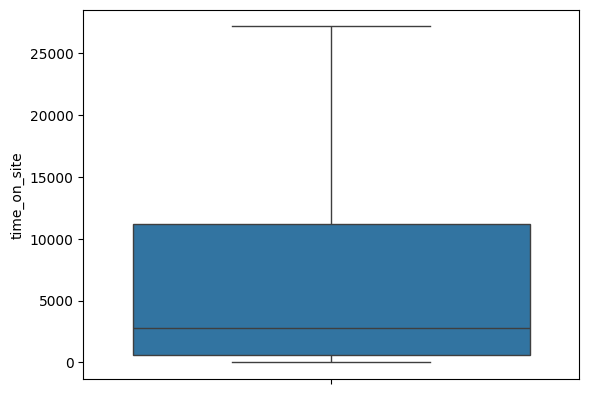

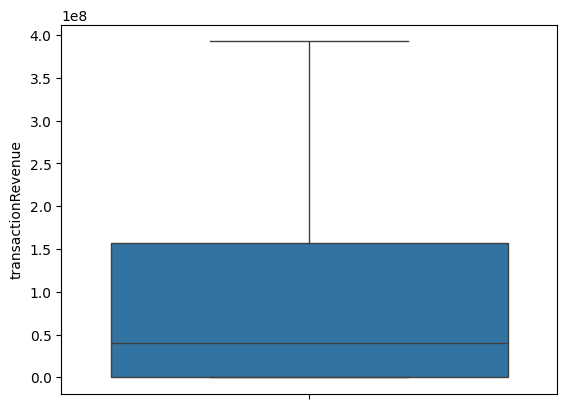

In [ ]:
for i in x.columns:
  sns.boxplot(x[i])
  plt.show()

In [ ]:
from scipy.stats.mstats import winsorize
for i in x.columns:
  x[i] = winsorize(x[i],limits=(0.05,0.05))

In [31]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [32]:
for column in ['count_hit','historic_session_page','avg_visit_time','time_on_site','transactionRevenue']:
    if x[column].dtype != 'object':
        lr,ur=remove_outlier(x[column])
        x[column]=np.where(x[column]>ur,ur,x[column])
        x[column]=np.where(x[column]<lr,lr,x[column])

In [33]:
x.head(50)

,count_hit,channelGrouping,device_deviceCategory,geoNetwork_region,historic_session_page,avg_visit_time,latest_source,earliest_medium,latest_medium,time_on_site,transactionRevenue
0,1194.0,0,1,71,1254.0,18.0,5,3,0,5617.0,0.0
1,1194.0,0,1,71,1254.0,18.0,5,3,0,5617.0,0.0
2,1816.0,2,1,2,4962.5,11.0,4,0,1,27171.0,392754492.5
3,299.0,2,1,1,0.0,17.0,4,7,1,1576.0,0.0
4,299.0,2,1,1,0.0,17.0,4,7,1,1576.0,0.0
5,299.0,2,1,1,0.0,17.0,4,7,1,1576.0,0.0
6,299.0,2,1,1,0.0,17.0,4,7,1,1576.0,0.0
7,299.0,2,1,1,0.0,17.0,4,7,1,1576.0,0.0
8,299.0,2,1,1,0.0,17.0,4,7,1,1576.0,0.0
9,299.0,2,1,1,0.0,17.0,4,7,1,1576.0,0.0


In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   count_hit              100000 non-null  float64
 1   channelGrouping        100000 non-null  int8   
 2   device_deviceCategory  100000 non-null  int8   
 3   geoNetwork_region      100000 non-null  int8   
 4   historic_session_page  100000 non-null  float64
 5   avg_visit_time         100000 non-null  float64
 6   latest_source          100000 non-null  int8   
 7   earliest_medium        100000 non-null  int8   
 8   latest_medium          100000 non-null  int8   
 9   time_on_site           100000 non-null  float64
 10  transactionRevenue     100000 non-null  float64
dtypes: float64(5), int8(6)
memory usage: 4.4 MB


In [35]:
for column in ['count_hit','historic_session_page','avg_visit_time','time_on_site','transactionRevenue']:
    x[column] = x[column].astype(int)

In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   count_hit              100000 non-null  int32
 1   channelGrouping        100000 non-null  int8 
 2   device_deviceCategory  100000 non-null  int8 
 3   geoNetwork_region      100000 non-null  int8 
 4   historic_session_page  100000 non-null  int32
 5   avg_visit_time         100000 non-null  int32
 6   latest_source          100000 non-null  int8 
 7   earliest_medium        100000 non-null  int8 
 8   latest_medium          100000 non-null  int8 
 9   time_on_site           100000 non-null  int32
 10  transactionRevenue     100000 non-null  int32
dtypes: int32(5), int8(6)
memory usage: 2.5 MB


In [ ]:
x.min()

count_hit                2.0
channelGrouping          0.0
device_deviceCategory    0.0
geoNetwork_region        0.0
historic_session_page    0.0
avg_visit_time           6.5
latest_source            0.0
earliest_medium          0.0
latest_medium            0.0
time_on_site             0.0
transactionRevenue       0.0
dtype: float64

In [37]:
x.max()

count_hit                    10573
channelGrouping                  2
device_deviceCategory            2
geoNetwork_region               90
historic_session_page         4962
avg_visit_time                  18
latest_source                    6
earliest_medium                 17
latest_medium                    1
time_on_site                 27171
transactionRevenue       392754492
dtype: int32

In [38]:
x.isnull().sum()

count_hit                0
channelGrouping          0
device_deviceCategory    0
geoNetwork_region        0
historic_session_page    0
avg_visit_time           0
latest_source            0
earliest_medium          0
latest_medium            0
time_on_site             0
transactionRevenue       0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()
x = sts.fit_transform(x)

In [ ]:
x

array([[-6.87650905e-01, -5.77135154e+00,  2.40315883e-01, ...,
        -2.23604562e+02, -2.03725504e-01, -7.69845966e-01],
       [-6.87650905e-01, -5.77135154e+00,  2.40315883e-01, ...,
        -2.23604562e+02, -2.03725504e-01, -7.69845966e-01],
       [-4.83351555e-01,  3.70148189e-01,  2.40315883e-01, ...,
         4.47218068e-03,  2.06227155e+00,  2.11704045e+00],
       ...,
       [ 2.39309789e+00,  3.70148189e-01,  2.40315883e-01, ...,
         4.47218068e-03, -7.94247237e-01,  3.26472256e-01],
       [ 2.39309789e+00,  3.70148189e-01,  2.40315883e-01, ...,
         4.47218068e-03, -7.94247237e-01,  3.26472256e-01],
       [ 2.39309789e+00,  3.70148189e-01,  2.40315883e-01, ...,
         4.47218068e-03, -7.94247237e-01,  3.26472256e-01]])

In [39]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [40]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [41]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='saga',penalty='none')
LRModel = LR.fit(xtrain,ytrain)
LRPredict = LRModel.predict(xtest)
LRaccuracy = (accuracy_score(ytest,LRPredict)).round(2)
LRprecision = (precision_score(ytest,LRPredict)).round(2)
LRrecall = (recall_score(ytest,LRPredict)).round(2)
LRf1 = (f1_score(ytest,LRPredict)).round(2)
print(confusion_matrix(ytest,LRPredict))
print("accuracy_score - ",LRaccuracy)
print("precision_score - ",LRprecision)
print("recall_score - ",LRrecall)
print("f1_score - ",LRf1)
print(classification_report(ytest,LRPredict))


[[11742  2852]
 [    0 15406]]
accuracy_score -  0.9
precision_score -  0.84
recall_score -  1.0
f1_score -  0.92
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     14594
           1       0.84      1.00      0.92     15406

    accuracy                           0.90     30000
   macro avg       0.92      0.90      0.90     30000
weighted avg       0.92      0.90      0.90     30000



In [42]:
lr = LRModel.predict(xtrain)
print(classification_report(ytrain,lr))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     33679
           1       0.85      1.00      0.92     36321

    accuracy                           0.91     70000
   macro avg       0.92      0.90      0.90     70000
weighted avg       0.92      0.91      0.90     70000



AUC-ROC Score: 0.9022886117582568


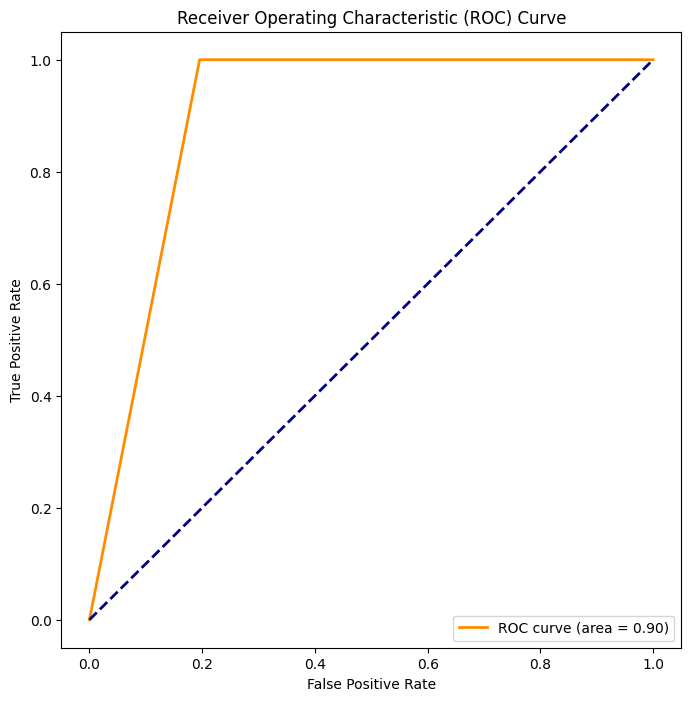

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve, auc


# Calculate AUC-ROC score
roc_auc = roc_auc_score(ytest, LRPredict)
print(f"AUC-ROC Score: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(ytest, LRPredict)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig("LR_roc_curve.jpg")
plt.show()



In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(solver='eigen',shrinkage='auto').fit(xtrain,ytrain)
LDAPredict = LDA.predict(xtest)
ldaaccuracy = (accuracy_score(ytest,LDAPredict)).round(2)
ldaprecision = (precision_score(ytest,LDAPredict)).round(2)
ldarecall = (recall_score(ytest,LDAPredict)).round(2)
ldaf1 = (f1_score(ytest,LDAPredict)).round(2)
print(confusion_matrix(ytest,LDAPredict))
print("accuracy_score - ",ldaaccuracy)
print("precision_score - ",ldaprecision)
print("recall_score - ",ldarecall)
print("f1_score - ",ldaf1)
print(classification_report(ytest,LDAPredict))

[[12843  1751]
 [ 2179 13227]]
accuracy_score -  0.87
precision_score -  0.88
recall_score -  0.86
f1_score -  0.87
              precision    recall  f1-score   support

           0       0.85      0.88      0.87     14594
           1       0.88      0.86      0.87     15406

    accuracy                           0.87     30000
   macro avg       0.87      0.87      0.87     30000
weighted avg       0.87      0.87      0.87     30000



In [45]:
lda = LDA.predict(xtrain)
print(classification_report(ytrain,lda))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     33679
           1       0.88      0.86      0.87     36321

    accuracy                           0.87     70000
   macro avg       0.87      0.87      0.87     70000
weighted avg       0.87      0.87      0.87     70000



AUC-ROC Score: 0.869290392671851


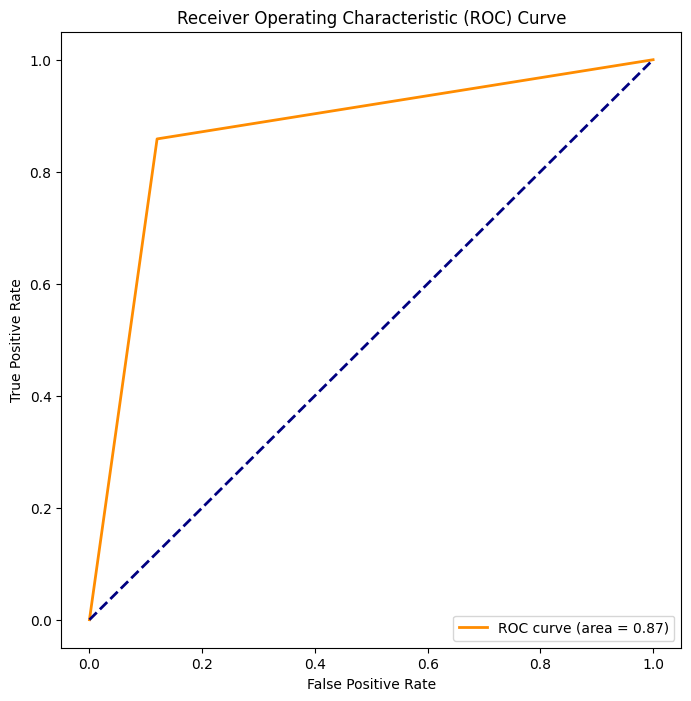

In [46]:
roc_auc = roc_auc_score(ytest, LDAPredict)
print(f"AUC-ROC Score: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(ytest, LDAPredict)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig("LDA_roc_curve.jpg")
plt.show()


In [47]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'gini', max_depth =3,min_samples_leaf=23,min_samples_split=75).fit(xtrain,ytrain)
DTCPredict = DTC.predict(xtest)
dtcaccuracy = (accuracy_score(ytest,DTCPredict)).round(2)
dtcprecision = (precision_score(ytest,DTCPredict)).round(2)
dtcrecall = (recall_score(ytest,DTCPredict)).round(2)
dtcf1 = (f1_score(ytest,DTCPredict)).round(2)
print(confusion_matrix(ytest,DTCPredict))
print("accuracy_score - ",dtcaccuracy)
print("precision_score - ",dtcprecision)
print("recall_score - ",dtcrecall)
print("f1_score - ",dtcf1)
print(classification_report(ytest,DTCPredict))

[[14468   126]
 [ 2126 13280]]
accuracy_score -  0.92
precision_score -  0.99
recall_score -  0.86
f1_score -  0.92
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     14594
           1       0.99      0.86      0.92     15406

    accuracy                           0.92     30000
   macro avg       0.93      0.93      0.92     30000
weighted avg       0.93      0.92      0.92     30000



In [48]:
dtc = DTC.predict(xtrain)
print(classification_report(ytrain,dtc))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     33679
           1       0.99      0.86      0.92     36321

    accuracy                           0.93     70000
   macro avg       0.93      0.93      0.93     70000
weighted avg       0.93      0.93      0.93     70000



AUC-ROC Score: 0.9266840661988265


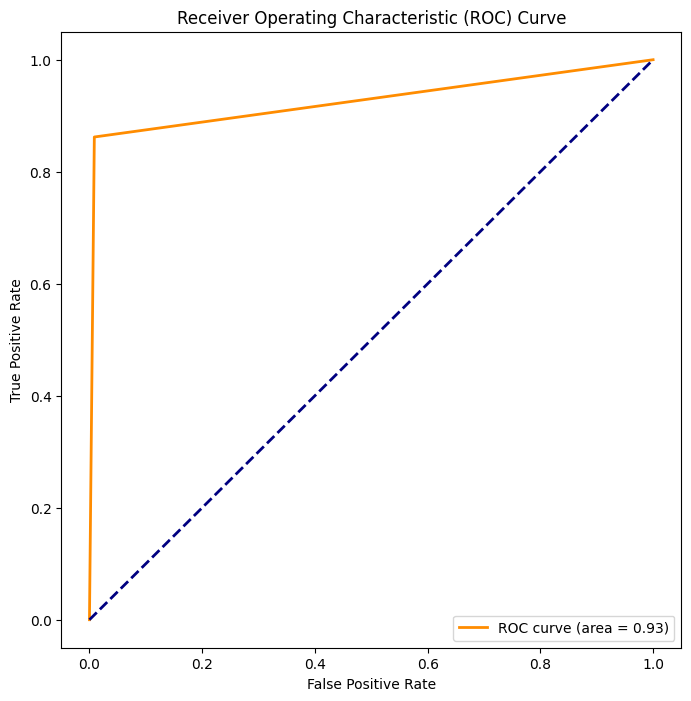

In [49]:
roc_auc = roc_auc_score(ytest, DTCPredict)
print(f"AUC-ROC Score: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(ytest, DTCPredict)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig("DT_roc_curve.jpg")
plt.show()


In [50]:
from sklearn.ensemble import RandomForestClassifier
rtc = RandomForestClassifier(criterion='gini',n_estimators=200, max_depth=2, min_samples_split=21, min_samples_leaf=15,max_features=11, ).fit(xtrain,ytrain)
rtcpredict = rtc.predict(xtest)
rfcaccuracy = (accuracy_score(ytest,rtcpredict)).round(2)
rfcprecision = (precision_score(ytest,rtcpredict)).round(2)
rfcrecall = (recall_score(ytest,rtcpredict)).round(2)
rfcf1 = (f1_score(ytest,rtcpredict)).round(2)
print(confusion_matrix(ytest,rtcpredict))
print("accuracy_score - ",rfcaccuracy)
print("precision_score - ",rfcprecision)
print("recall_score - ",rfcrecall)
print("f1_score - ",rfcf1)
print(classification_report(ytest,rtcpredict))

[[14448   146]
 [ 2373 13033]]
accuracy_score -  0.92
precision_score -  0.99
recall_score -  0.85
f1_score -  0.91
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     14594
           1       0.99      0.85      0.91     15406

    accuracy                           0.92     30000
   macro avg       0.92      0.92      0.92     30000
weighted avg       0.93      0.92      0.92     30000



In [ ]:
param_grid = {
    'max_depth': [7, 8],
    'max_features': [9, 10, 11],
    'min_samples_leaf': [20, 25],
    'min_samples_split': [60, 75],
    'n_estimators': [101, 301]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(xtrain, ytrain)
print(grid_search.best_params_)

In [51]:
rfc = rtc.predict(xtrain)
print(classification_report(ytrain,rfc))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     33679
           1       0.99      0.85      0.92     36321

    accuracy                           0.92     70000
   macro avg       0.93      0.92      0.92     70000
weighted avg       0.93      0.92      0.92     70000



AUC-ROC Score: 0.917982495834148


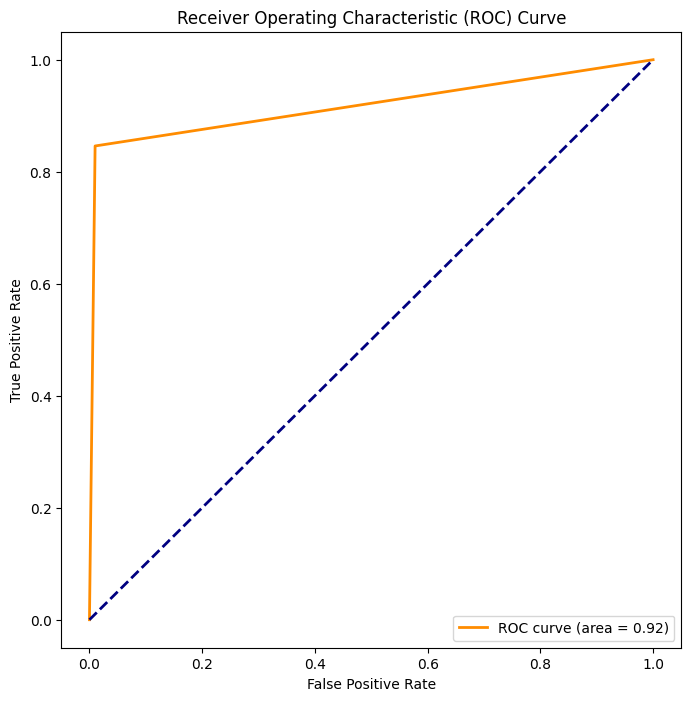

In [52]:
roc_auc = roc_auc_score(ytest, rtcpredict)
print(f"AUC-ROC Score: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(ytest, rtcpredict)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig("RF_roc_curve.jpg")
plt.show()


In [53]:
report = {
    "Model name": ["LogisticRegression","LDA","DecisionTreeClassifier","RandomForestClassifier"],
    "Accuracy": [LRaccuracy,ldaaccuracy,dtcaccuracy,rfcaccuracy],
    "Precision": [LRprecision,ldaprecision,dtcprecision,rfcprecision],
    "Recall": [LRrecall,ldarecall,dtcrecall,rfcrecall],
    "F1_score": [LRf1,ldaf1,dtcf1,rfcf1]
}


In [54]:
reportdf = pd.DataFrame(report)
reportdf

,Model name,Accuracy,Precision,Recall,F1_score
0,LogisticRegression,0.90,0.84,1.00,0.92
1,LDA,0.87,0.88,0.86,0.87
2,DecisionTreeClassifier,0.92,0.99,0.86,0.92
3,RandomForestClassifier,0.92,0.99,0.85,0.91


In [ ]:
reportdf.to_csv("report.csv")

In [55]:
from joblib import dump

In [56]:
DTC

DecisionTreeClassifier(max_depth=3, min_samples_leaf=23, min_samples_split=75)

In [57]:
dump(DTC,"DTCModel.joblib")

['DTCModel.joblib']

In [58]:
re = pd.read_csv("report.csv")
re.drop("Unnamed: 0",axis=1,inplace=True)
re

,Model name,Accuracy,Precision,Recall,F1_score
0,LogisticRegression,0.90,0.84,1.00,0.92
1,LDA,0.87,0.88,0.86,0.87
2,DecisionTreeClassifier,0.92,0.99,0.86,0.92
3,RandomForestClassifier,0.92,0.99,0.85,0.91


In [59]:
fig = px.bar(re,x='Model name',y=['Accuracy','Precision','Recall','F1_score'],barmode='group')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed